<a href="https://colab.research.google.com/github/Malek0007/Language-detector/blob/main/Language_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import CountVectorizer
import gc
data = pd.read_csv("Language_Detection.csv")

print(data)
data.head(10)
counts=data["Language"].value_counts()

X = data["Text"]
y = data["Language"]

le = LabelEncoder()
y = le.fit_transform(y)

data_list = []
for text in X:
 text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
 text = re.sub(r'[[]]', ' ', text)
 text = text.lower()
 data_list.append(text)

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

del data_list
gc.collect()

                                                    Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]


27

In [ ]:
X
X.shape


(10337, 39404)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
y = y.astype(np.int8)
X = X.astype(np.int16)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pickle
model = MultinomialNB()
model.fit(x_train, y_train)

filename = 'language_detection_model.sav'
pickle.dump(model, open(filename, 'wb'))




In [ ]:
filename = 'language_detection_model.sav'
model = pickle.load(open(filename, 'rb'))
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([ 3,  3, 10, ...,  0, 15, 12], dtype=int8)

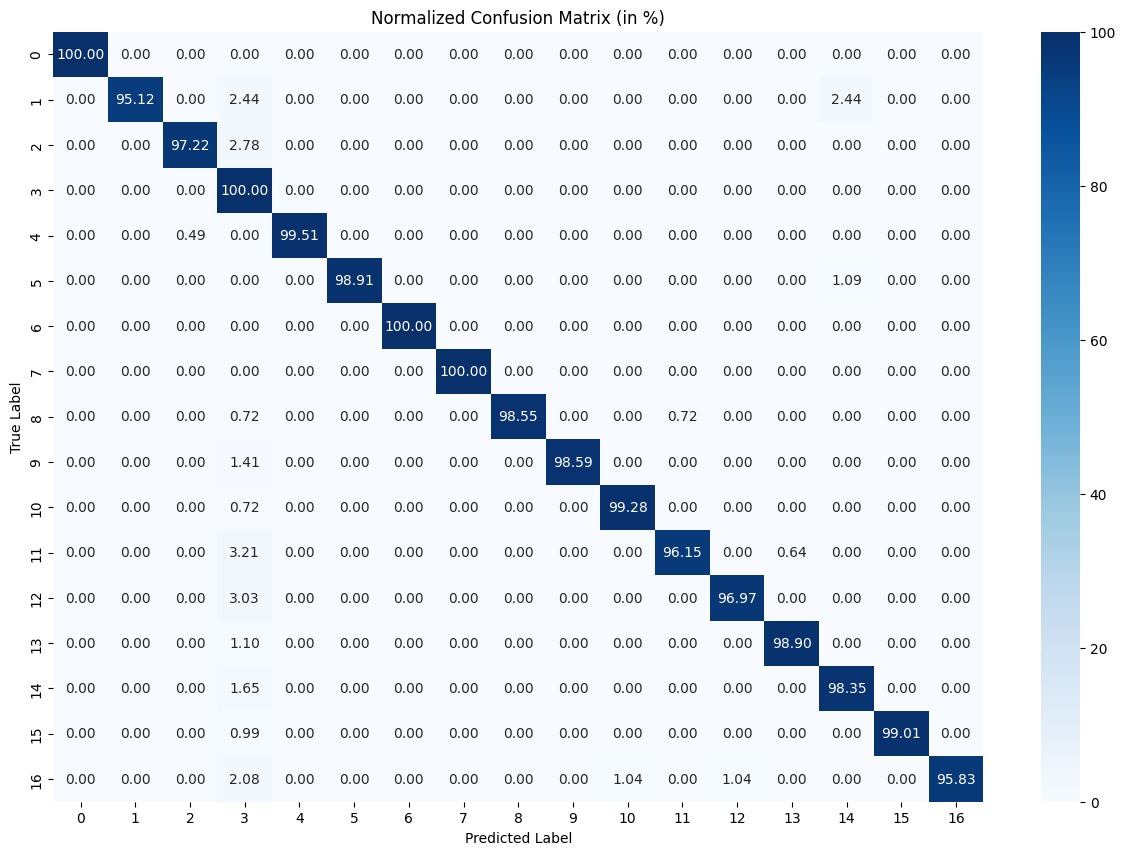

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ac = 100 * accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize='true') * 100

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (in %)')
plt.show()


In [ ]:
def predict(text):
 x = cv.transform([text]).toarray()
 lang = model.predict(x)
 lang = le.inverse_transform(lang)
 print("The langauge is in",lang[0])
predict("Est-ce que cet exercice vous a permis d'avoir un aperçu introductif au traitement naturel du langage ?")
predict("Did this exercise give you an introductory overview to natural language processing?")
predict("Bu alıştırma size doğal dil işlemeye giriş niteliğinde bir genel bakış sağladı mı?")
predict("هل أعطاك هذا التمرين نظرة عامة تمهيدية حول معالجة اللغة الطبيعية؟")
predict("¿Este ejercicio le brindó una introducción al procesamiento del lenguaje natural?")
predict("ഈവŖായാമം നിšൾŚ് സřാഭാവിക ഭാഷാേ േŗപാസƋിംഗിŀെറ ഒരുആമുഖ അവേലാകനം നൽകിേയാ?")
predict("Это упражнение дало вам вводный обзор обработки естественного языка?")


The langauge is in French
The langauge is in English
The langauge is in Turkish
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import string
from sklearn.preprocessing import LabelEncoder
import re
texts = ["chien chat poisson ", "chien chat chat ", "poisson oiseau oiseau"]

# Initialisation de CountVectorizer
cv = CountVectorizer()

# Adapter CountVectorizer aux données et transformer les textes en matrice de comptage des mots
cv_fit = cv.fit_transform(texts)



# Afficher la représentation en tableau de la matrice de comptage des mots
print(cv_fit.toarray())


[[1 1 0 1]
 [2 1 0 0]
 [0 0 2 1]]


In [ ]:
 data_list


[' nature  in the broadest sense  is the natural  physical  material world or universe.',
 ' nature  can refer to the phenomena of the physical world  and also to life in general.',
 'the study of nature is a large  if not the only  part of science.',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
 '[ ] the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .',
 '[ ] in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord.',
 '[ ][ ] \nthe concept of nature as a whole  the physical universe  is one of several expansions of the original notion [ ] it began with certain core applications of t

In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')


data = pd.read_csv("Language_Detection.csv")


def preprocess_text(text):
    # Tokenisation
    tokens = word_tokenize(text)
    # Apply in minuscule minuscules
    tokens = [token.lower() for token in tokens]
    # Suppression of ponctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Suppression of empty words
    stop_words = set(stopwords.words('english'))  # Adapté à l'anglais, modifier selon la langue
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# pretreatment of text
data['Preprocessed_Text'] = data['Text'].apply(preprocess_text)

print(data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    Text Language  \
0       Nature, in the broadest sense, is the natural...  English   
1      "Nature" can refer to the phenomena of the phy...  English   
2      The study of nature is a large, if not the onl...  English   
3      Although humans are part of nature, human acti...  English   
4      [1] The word nature is borrowed from the Old F...  English   
...                                                  ...      ...   
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada   
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada   
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada   
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada   
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada   

                                       Preprocessed_Text  
0      [nature, broadest, sense, natural, physical, m...  
1      [``, nature, '', refer, phenomena, physical, w